In [1]:
import numpy as np
import polars as pl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
data=pl.read_csv("dirty_cafe_sales.csv")
print(data.head())

shape: (5, 8)
┌───────────────┬────────┬──────────┬───────────┬───────┬───────────────┬──────────┬───────────────┐
│ Transaction   ┆ Item   ┆ Quantity ┆ Price Per ┆ Total ┆ Payment       ┆ Location ┆ Transaction   │
│ ID            ┆ ---    ┆ ---      ┆ Unit      ┆ Spent ┆ Method        ┆ ---      ┆ Date          │
│ ---           ┆ str    ┆ str      ┆ ---       ┆ ---   ┆ ---           ┆ str      ┆ ---           │
│ str           ┆        ┆          ┆ str       ┆ str   ┆ str           ┆          ┆ str           │
╞═══════════════╪════════╪══════════╪═══════════╪═══════╪═══════════════╪══════════╪═══════════════╡
│ TXN_1961373   ┆ Coffee ┆ 2        ┆ 2.0       ┆ 4.0   ┆ Credit Card   ┆ Takeaway ┆ 2023-09-08    │
│ TXN_4977031   ┆ Cake   ┆ 4        ┆ 3.0       ┆ 12.0  ┆ Cash          ┆ In-store ┆ 2023-05-16    │
│ TXN_4271903   ┆ Cookie ┆ 4        ┆ 1.0       ┆ ERROR ┆ Credit Card   ┆ In-store ┆ 2023-07-19    │
│ TXN_7034554   ┆ Salad  ┆ 2        ┆ 5.0       ┆ 10.0  ┆ UNKNOWN       ┆ UNK

In [3]:
data.shape

(10000, 8)

In [4]:
null_counts = data.select(pl.all().is_null().sum())
print(null_counts)

shape: (1, 8)
┌────────────────┬──────┬──────────┬───────────┬─────────────┬─────────┬──────────┬─────────────┐
│ Transaction ID ┆ Item ┆ Quantity ┆ Price Per ┆ Total Spent ┆ Payment ┆ Location ┆ Transaction │
│ ---            ┆ ---  ┆ ---      ┆ Unit      ┆ ---         ┆ Method  ┆ ---      ┆ Date        │
│ u32            ┆ u32  ┆ u32      ┆ ---       ┆ u32         ┆ ---     ┆ u32      ┆ ---         │
│                ┆      ┆          ┆ u32       ┆             ┆ u32     ┆          ┆ u32         │
╞════════════════╪══════╪══════════╪═══════════╪═════════════╪═════════╪══════════╪═════════════╡
│ 0              ┆ 333  ┆ 138      ┆ 179       ┆ 173         ┆ 2579    ┆ 3265     ┆ 159         │
└────────────────┴──────┴──────────┴───────────┴─────────────┴─────────┴──────────┴─────────────┘


In [5]:
data.head()

Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
str,str,str,str,str,str,str,str
"""TXN_1961373""","""Coffee""","""2""","""2.0""","""4.0""","""Credit Card""","""Takeaway""","""2023-09-08"""
"""TXN_4977031""","""Cake""","""4""","""3.0""","""12.0""","""Cash""","""In-store""","""2023-05-16"""
"""TXN_4271903""","""Cookie""","""4""","""1.0""","""ERROR""","""Credit Card""","""In-store""","""2023-07-19"""
"""TXN_7034554""","""Salad""","""2""","""5.0""","""10.0""","""UNKNOWN""","""UNKNOWN""","""2023-04-27"""
"""TXN_3160411""","""Coffee""","""2""","""2.0""","""4.0""","""Digital Wallet""","""In-store""","""2023-06-11"""


In [6]:
for column in data.columns:
    unique_values = data[column].unique()
    if unique_values.len() <= 20:
        print(f"Уникальные значения в '{column}': {unique_values.to_list()}")
    else:
        print(f"В '{column}' - {unique_values.len()} уникальных значений.")

В 'Transaction ID' - 10000 уникальных значений.
Уникальные значения в 'Item': ['Smoothie', 'Coffee', 'Salad', 'UNKNOWN', 'Juice', 'Cookie', 'Cake', 'Tea', 'ERROR', None, 'Sandwich']
Уникальные значения в 'Quantity': ['ERROR', '4', '3', None, '1', '2', '5', 'UNKNOWN']
Уникальные значения в 'Price Per Unit': ['1.5', 'UNKNOWN', 'ERROR', '4.0', '5.0', '3.0', None, '1.0', '2.0']
Уникальные значения в 'Total Spent': ['3.0', '1.0', 'ERROR', '8.0', '12.0', '5.0', '2.0', None, '25.0', '1.5', '16.0', '7.5', '6.0', '10.0', '4.5', '4.0', '15.0', '20.0', '9.0', 'UNKNOWN']
Уникальные значения в 'Payment Method': [None, 'UNKNOWN', 'Credit Card', 'Digital Wallet', 'ERROR', 'Cash']
Уникальные значения в 'Location': ['In-store', 'UNKNOWN', None, 'Takeaway', 'ERROR']
В 'Transaction Date' - 368 уникальных значений.


# Очищаю датасет от значений ["ERROR", "UNKNOWN"]

In [7]:
missing_values = ["ERROR", "UNKNOWN"]
data_with_nulls = data.with_columns(
    pl.when(pl.col(col).is_in(missing_values))
      .then(None)
      .otherwise(pl.col(col))
      .alias(col)
    for col in data.columns
)

null_counts = data_with_nulls.select(pl.all().is_null().sum())
print(null_counts)

shape: (1, 8)
┌────────────────┬──────┬──────────┬───────────┬─────────────┬─────────┬──────────┬─────────────┐
│ Transaction ID ┆ Item ┆ Quantity ┆ Price Per ┆ Total Spent ┆ Payment ┆ Location ┆ Transaction │
│ ---            ┆ ---  ┆ ---      ┆ Unit      ┆ ---         ┆ Method  ┆ ---      ┆ Date        │
│ u32            ┆ u32  ┆ u32      ┆ ---       ┆ u32         ┆ ---     ┆ u32      ┆ ---         │
│                ┆      ┆          ┆ u32       ┆             ┆ u32     ┆          ┆ u32         │
╞════════════════╪══════╪══════════╪═══════════╪═════════════╪═════════╪══════════╪═════════════╡
│ 0              ┆ 969  ┆ 479      ┆ 533       ┆ 502         ┆ 3178    ┆ 3961     ┆ 460         │
└────────────────┴──────┴──────────┴───────────┴─────────────┴─────────┴──────────┴─────────────┘


In [8]:
for column in data_with_nulls.columns:
    unique_values = data_with_nulls[column].unique()
    if unique_values.len() <= 20:
        print(f"Уникальные значения в '{column}': {unique_values.to_list()}")
    else:
        print(f"В '{column}' - {unique_values.len()} уникальных значений.")

В 'Transaction ID' - 10000 уникальных значений.
Уникальные значения в 'Item': ['Cookie', 'Salad', 'Cake', 'Coffee', None, 'Smoothie', 'Sandwich', 'Tea', 'Juice']
Уникальные значения в 'Quantity': ['2', '1', '3', '4', '5', None]
Уникальные значения в 'Price Per Unit': [None, '5.0', '3.0', '1.0', '1.5', '2.0', '4.0']
Уникальные значения в 'Total Spent': ['6.0', '20.0', '4.5', '9.0', None, '10.0', '5.0', '3.0', '1.0', '7.5', '16.0', '2.0', '15.0', '1.5', '25.0', '4.0', '8.0', '12.0']
Уникальные значения в 'Payment Method': ['Digital Wallet', 'Credit Card', 'Cash', None]
Уникальные значения в 'Location': ['Takeaway', 'In-store', None]
В 'Transaction Date' - 366 уникальных значений.


In [9]:

print(data_with_nulls.head())

shape: (5, 8)
┌───────────────┬────────┬──────────┬───────────┬───────┬───────────────┬──────────┬───────────────┐
│ Transaction   ┆ Item   ┆ Quantity ┆ Price Per ┆ Total ┆ Payment       ┆ Location ┆ Transaction   │
│ ID            ┆ ---    ┆ ---      ┆ Unit      ┆ Spent ┆ Method        ┆ ---      ┆ Date          │
│ ---           ┆ str    ┆ str      ┆ ---       ┆ ---   ┆ ---           ┆ str      ┆ ---           │
│ str           ┆        ┆          ┆ str       ┆ str   ┆ str           ┆          ┆ str           │
╞═══════════════╪════════╪══════════╪═══════════╪═══════╪═══════════════╪══════════╪═══════════════╡
│ TXN_1961373   ┆ Coffee ┆ 2        ┆ 2.0       ┆ 4.0   ┆ Credit Card   ┆ Takeaway ┆ 2023-09-08    │
│ TXN_4977031   ┆ Cake   ┆ 4        ┆ 3.0       ┆ 12.0  ┆ Cash          ┆ In-store ┆ 2023-05-16    │
│ TXN_4271903   ┆ Cookie ┆ 4        ┆ 1.0       ┆ null  ┆ Credit Card   ┆ In-store ┆ 2023-07-19    │
│ TXN_7034554   ┆ Salad  ┆ 2        ┆ 5.0       ┆ 10.0  ┆ null          ┆ nul

# Импьютируем самые популярные значения

In [10]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [11]:
imp = SimpleImputer(missing_values=None, strategy='most_frequent')
data_imp = imp.fit_transform(data_with_nulls.to_numpy())
data_imp_df_simp = pl.DataFrame(data_imp, schema=data_with_nulls.columns)

In [12]:
for column in data_imp_df_simp.columns:
    unique_values = data_imp_df_simp[column].unique()
    if len(unique_values) <= 20:
        print(f"Уникальные значения в '{column}': {unique_values.to_list()}")
    else:
        print(f"В '{column}' - {len(unique_values)} уникальных значений.")

В 'Transaction ID' - 10000 уникальных значений.
Уникальные значения в 'Item': ['Coffee', 'Smoothie', 'Sandwich', 'Cookie', 'Tea', 'Juice', 'Cake', 'Salad']
Уникальные значения в 'Quantity': ['2', '5', '4', '3', '1']
Уникальные значения в 'Price Per Unit': ['5.0', '1.0', '2.0', '3.0', '1.5', '4.0']
Уникальные значения в 'Total Spent': ['8.0', '5.0', '10.0', '1.5', '20.0', '4.0', '7.5', '6.0', '1.0', '15.0', '2.0', '16.0', '25.0', '12.0', '4.5', '3.0', '9.0']
Уникальные значения в 'Payment Method': ['Cash', 'Digital Wallet', 'Credit Card']
Уникальные значения в 'Location': ['Takeaway', 'In-store']
В 'Transaction Date' - 365 уникальных значений.


# Импьютируем с помощью метода MICE

In [13]:
import polars as pl
from miceforest import ImputationKernel

In [14]:
df_pandas = data_with_nulls.to_pandas()

df_pandas["Transaction ID"] = df_pandas["Transaction ID"].astype("category")   # Ensure string
df_pandas["Item"] = df_pandas["Item"].astype("category")              # Categorical
df_pandas["Quantity"] = df_pandas["Quantity"].astype("Int64")         # Integer, nullable
df_pandas["Price Per Unit"] = df_pandas["Price Per Unit"].astype(float)  # Float
df_pandas["Total Spent"] = df_pandas["Total Spent"].astype(float)     # Float
df_pandas["Payment Method"] = df_pandas["Payment Method"].astype("category")  # Categorical
df_pandas["Location"] = df_pandas["Location"].astype("category")      # Categorical
# Шаг 1: Преобразование в datetime
df_pandas["Transaction Date"] = pd.to_datetime(df_pandas["Transaction Date"], format="%Y-%m-%d", errors="coerce")
print("После первого преобразования:")
print(df_pandas["Transaction Date"].head(12))

dirty_df = df_pandas
missing_mask_date = dirty_df["Transaction Date"].isna()

# Шаг 2: Преобразование в Unix-время (в секундах)
df_pandas["Transaction Date"] = df_pandas["Transaction Date"].astype("int64") // 10**9
df_pandas.loc[missing_mask_date, "Transaction Date"] = None
print("После преобразования в Unix-время (секунды):")
print(df_pandas["Transaction Date"].head(12))

# Шаг 3: Обратное преобразование в datetime
# df_pandas["Transaction Date"] = pd.to_datetime(df_pandas["Transaction Date"], unit="s", errors="coerce")
# print("После обратного преобразования:")
# print(df_pandas.head(1))


for col in df_pandas.select_dtypes(include="object").columns:
    df_pandas[col] = df_pandas[col].astype("category")

# print(df_pandas.dtypes)
# print(df_pandas)

После первого преобразования:
0    2023-09-08
1    2023-05-16
2    2023-07-19
3    2023-04-27
4    2023-06-11
5    2023-03-31
6    2023-10-06
7    2023-10-28
8    2023-07-28
9    2023-12-31
10   2023-11-07
11          NaT
Name: Transaction Date, dtype: datetime64[ns]
После преобразования в Unix-время (секунды):
0     1.694131e+09
1     1.684195e+09
2     1.689725e+09
3     1.682554e+09
4     1.686442e+09
5     1.680221e+09
6     1.696550e+09
7     1.698451e+09
8     1.690502e+09
9     1.703981e+09
10    1.699315e+09
11             NaN
Name: Transaction Date, dtype: float64


In [15]:
# Создаем ядро MICE
kernel = ImputationKernel(df_pandas, num_datasets=1, random_state=42)

# Запускаем процесс импутации
kernel.mice(iterations=5, use_gbdt=False)

# Получаем восстановленные данные
data_imp_pd = kernel.complete_data(dataset=0)

In [16]:
data_imp_pd["Transaction Date"] = pd.to_datetime(data_imp_pd["Transaction Date"], unit="s", errors="coerce")
print(data_imp_pd)

     Transaction ID      Item  Quantity  Price Per Unit  Total Spent  \
0       TXN_1961373    Coffee         2             2.0          4.0   
1       TXN_4977031      Cake         4             3.0         12.0   
2       TXN_4271903    Cookie         4             1.0          4.0   
3       TXN_7034554     Salad         2             5.0         10.0   
4       TXN_3160411    Coffee         2             2.0          4.0   
...             ...       ...       ...             ...          ...   
9995    TXN_7672686    Coffee         2             2.0          4.0   
9996    TXN_9659401      Cake         3             1.0          3.0   
9997    TXN_5255387    Coffee         4             2.0          8.0   
9998    TXN_7695629    Cookie         3             1.0          3.0   
9999    TXN_6170729  Sandwich         3             4.0         12.0   

      Payment Method  Location Transaction Date  
0        Credit Card  Takeaway       2023-09-08  
1               Cash  In-store     

In [17]:
column_name = 'Transaction Date'
print(f"Пропуски и их заполнение в столбце '{column_name}':")
print(dirty_df[column_name].isna().sum(), "пропусков")
print(data_imp_pd[column_name][dirty_df[column_name].isna()])

Пропуски и их заполнение в столбце 'Transaction Date':
460 пропусков
11     2023-08-13
29     2023-10-04
33     2023-03-14
77     2023-01-16
103    2023-05-21
          ...    
9933   2023-03-09
9937   2023-04-04
9949   2023-04-02
9983   2023-10-25
9988   2023-03-10
Name: Transaction Date, Length: 460, dtype: datetime64[ns]


In [18]:
print(data_imp_pd)
# Преобразуем обратно в Polars DataFrame
# Handle invalid dates in the imputed DataFrame

# Convert back to Polars DataFrame
data_imp_df = pl.from_pandas(data_imp_pd).with_columns([
    pl.col(col).cast(data_with_nulls.schema[col]) for col in data_with_nulls.columns
])

     Transaction ID      Item  Quantity  Price Per Unit  Total Spent  \
0       TXN_1961373    Coffee         2             2.0          4.0   
1       TXN_4977031      Cake         4             3.0         12.0   
2       TXN_4271903    Cookie         4             1.0          4.0   
3       TXN_7034554     Salad         2             5.0         10.0   
4       TXN_3160411    Coffee         2             2.0          4.0   
...             ...       ...       ...             ...          ...   
9995    TXN_7672686    Coffee         2             2.0          4.0   
9996    TXN_9659401      Cake         3             1.0          3.0   
9997    TXN_5255387    Coffee         4             2.0          8.0   
9998    TXN_7695629    Cookie         3             1.0          3.0   
9999    TXN_6170729  Sandwich         3             4.0         12.0   

      Payment Method  Location Transaction Date  
0        Credit Card  Takeaway       2023-09-08  
1               Cash  In-store     

In [19]:
# data_imp_df = data_imp_df.with_columns(
#     pl.col("Transaction Date").str.strptime(pl.Date, "%Y-%m-%d %H:%M:%S%.f").cast(pl.Date)
# )
data_with_nulls = data_with_nulls.with_columns(pl.col(column).cast(pl.Utf8).str.to_datetime(strict=False).dt.strftime('%Y-%m-%d'))
data_imp_df_simp = data_imp_df_simp.with_columns(pl.col(column).cast(pl.Utf8).str.to_datetime(strict=False).dt.strftime('%Y-%m-%d'))
data_imp_df = data_imp_df.with_columns(pl.col(column).str.strptime(pl.Date, "%Y-%m-%d %H:%M:%S%.f").cast(pl.Date))

print(data_imp_df)


shape: (10_000, 8)
┌──────────────┬──────────┬──────────┬──────────────┬───────┬─────────────┬──────────┬─────────────┐
│ Transaction  ┆ Item     ┆ Quantity ┆ Price Per    ┆ Total ┆ Payment     ┆ Location ┆ Transaction │
│ ID           ┆ ---      ┆ ---      ┆ Unit         ┆ Spent ┆ Method      ┆ ---      ┆ Date        │
│ ---          ┆ str      ┆ str      ┆ ---          ┆ ---   ┆ ---         ┆ str      ┆ ---         │
│ str          ┆          ┆          ┆ str          ┆ str   ┆ str         ┆          ┆ date        │
╞══════════════╪══════════╪══════════╪══════════════╪═══════╪═════════════╪══════════╪═════════════╡
│ TXN_1961373  ┆ Coffee   ┆ 2        ┆ 2.0          ┆ 4.0   ┆ Credit Card ┆ Takeaway ┆ 2023-09-08  │
│ TXN_4977031  ┆ Cake     ┆ 4        ┆ 3.0          ┆ 12.0  ┆ Cash        ┆ In-store ┆ 2023-05-16  │
│ TXN_4271903  ┆ Cookie   ┆ 4        ┆ 1.0          ┆ 4.0   ┆ Credit Card ┆ In-store ┆ 2023-07-19  │
│ TXN_7034554  ┆ Salad    ┆ 2        ┆ 5.0          ┆ 10.0  ┆ Credit Car

In [20]:
print(data_imp_df)

shape: (10_000, 8)
┌──────────────┬──────────┬──────────┬──────────────┬───────┬─────────────┬──────────┬─────────────┐
│ Transaction  ┆ Item     ┆ Quantity ┆ Price Per    ┆ Total ┆ Payment     ┆ Location ┆ Transaction │
│ ID           ┆ ---      ┆ ---      ┆ Unit         ┆ Spent ┆ Method      ┆ ---      ┆ Date        │
│ ---          ┆ str      ┆ str      ┆ ---          ┆ ---   ┆ ---         ┆ str      ┆ ---         │
│ str          ┆          ┆          ┆ str          ┆ str   ┆ str         ┆          ┆ date        │
╞══════════════╪══════════╪══════════╪══════════════╪═══════╪═════════════╪══════════╪═════════════╡
│ TXN_1961373  ┆ Coffee   ┆ 2        ┆ 2.0          ┆ 4.0   ┆ Credit Card ┆ Takeaway ┆ 2023-09-08  │
│ TXN_4977031  ┆ Cake     ┆ 4        ┆ 3.0          ┆ 12.0  ┆ Cash        ┆ In-store ┆ 2023-05-16  │
│ TXN_4271903  ┆ Cookie   ┆ 4        ┆ 1.0          ┆ 4.0   ┆ Credit Card ┆ In-store ┆ 2023-07-19  │
│ TXN_7034554  ┆ Salad    ┆ 2        ┆ 5.0          ┆ 10.0  ┆ Credit Car

In [21]:
for column in data_imp_df.columns:
    unique_values = data_imp_df[column].unique()
    if unique_values.len() <= 20:
        print(f"Уникальные значения в '{column}': {unique_values.to_list()}")
    else:
        print(f"В '{column}' - {unique_values.len()} уникальных значений.")

В 'Transaction ID' - 10000 уникальных значений.
Уникальные значения в 'Item': ['Coffee', 'Cake', 'Smoothie', 'Tea', 'Sandwich', 'Juice', 'Cookie', 'Salad']
Уникальные значения в 'Quantity': ['2', '3', '1', '4', '5']
Уникальные значения в 'Price Per Unit': ['1.5', '1.0', '2.0', '4.0', '5.0', '3.0']
Уникальные значения в 'Total Spent': ['4.0', '1.0', '10.0', '15.0', '25.0', '1.5', '9.0', '7.5', '16.0', '12.0', '5.0', '8.0', '2.0', '6.0', '20.0', '3.0', '4.5']
Уникальные значения в 'Payment Method': ['Credit Card', 'Digital Wallet', 'Cash']
Уникальные значения в 'Location': ['Takeaway', 'In-store']
В 'Transaction Date' - 365 уникальных значений.


# Преобразование категориальных признаков в числовые c помощью one-hot кодирования и label encoder

In [22]:
df_encoded = data_imp_df.to_dummies(columns=["Item", "Payment Method"])

print(df_encoded.columns)

['Transaction ID', 'Item_Cake', 'Item_Coffee', 'Item_Cookie', 'Item_Juice', 'Item_Salad', 'Item_Sandwich', 'Item_Smoothie', 'Item_Tea', 'Quantity', 'Price Per Unit', 'Total Spent', 'Payment Method_Cash', 'Payment Method_Credit Card', 'Payment Method_Digital Wallet', 'Location', 'Transaction Date']


In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_encoded_loc = le.fit_transform(df_encoded['Location'])
le.classes_

array(['In-store', 'Takeaway'], dtype='<U8')

In [24]:
df_encoded = df_encoded.with_columns(
    pl.Series("Location_encoded", df_encoded_loc)
)
df_encoded = df_encoded.drop('Location')

In [25]:
print(df_encoded.columns)

columns_to_select = [col for col in df_encoded.columns if col.startswith("Item")]

df_filtered = df_encoded.select(columns_to_select)

print(df_filtered)

['Transaction ID', 'Item_Cake', 'Item_Coffee', 'Item_Cookie', 'Item_Juice', 'Item_Salad', 'Item_Sandwich', 'Item_Smoothie', 'Item_Tea', 'Quantity', 'Price Per Unit', 'Total Spent', 'Payment Method_Cash', 'Payment Method_Credit Card', 'Payment Method_Digital Wallet', 'Transaction Date', 'Location_encoded']
shape: (10_000, 8)
┌───────────┬────────────┬────────────┬────────────┬────────────┬───────────┬───────────┬──────────┐
│ Item_Cake ┆ Item_Coffe ┆ Item_Cooki ┆ Item_Juice ┆ Item_Salad ┆ Item_Sand ┆ Item_Smoo ┆ Item_Tea │
│ ---       ┆ e          ┆ e          ┆ ---        ┆ ---        ┆ wich      ┆ thie      ┆ ---      │
│ u8        ┆ ---        ┆ ---        ┆ u8         ┆ u8         ┆ ---       ┆ ---       ┆ u8       │
│           ┆ u8         ┆ u8         ┆            ┆            ┆ u8        ┆ u8        ┆          │
╞═══════════╪════════════╪════════════╪════════════╪════════════╪═══════════╪═══════════╪══════════╡
│ 0         ┆ 1          ┆ 0          ┆ 0          ┆ 0          ┆ 0 

In [26]:
columns_to_select = [col for col in df_encoded.columns if col.startswith("Payment")]

df_filtered = df_encoded.select(columns_to_select)

print(df_filtered)

shape: (10_000, 3)
┌─────────────────────┬────────────────────────────┬───────────────────────────────┐
│ Payment Method_Cash ┆ Payment Method_Credit Card ┆ Payment Method_Digital Wallet │
│ ---                 ┆ ---                        ┆ ---                           │
│ u8                  ┆ u8                         ┆ u8                            │
╞═════════════════════╪════════════════════════════╪═══════════════════════════════╡
│ 0                   ┆ 1                          ┆ 0                             │
│ 1                   ┆ 0                          ┆ 0                             │
│ 0                   ┆ 1                          ┆ 0                             │
│ 0                   ┆ 1                          ┆ 0                             │
│ 0                   ┆ 0                          ┆ 1                             │
│ …                   ┆ …                          ┆ …                             │
│ 1                   ┆ 0                     

In [27]:
print(df_encoded['Location_encoded'])

shape: (10_000,)
Series: 'Location_encoded' [i64]
[
	1
	0
	0
	0
	0
	…
	1
	0
	1
	1
	0
]


In [28]:
for column in df_encoded.columns:
    unique_values = df_encoded[column].unique()
    if unique_values.len() <= 20:
        print(f"Уникальные значения в '{column}': {unique_values.to_list()}")
    else:
        print(f"В '{column}' - {unique_values.len()} уникальных значений.")

В 'Transaction ID' - 10000 уникальных значений.
Уникальные значения в 'Item_Cake': [0, 1]
Уникальные значения в 'Item_Coffee': [0, 1]
Уникальные значения в 'Item_Cookie': [0, 1]
Уникальные значения в 'Item_Juice': [0, 1]
Уникальные значения в 'Item_Salad': [0, 1]
Уникальные значения в 'Item_Sandwich': [0, 1]
Уникальные значения в 'Item_Smoothie': [0, 1]
Уникальные значения в 'Item_Tea': [0, 1]
Уникальные значения в 'Quantity': ['5', '2', '1', '4', '3']
Уникальные значения в 'Price Per Unit': ['5.0', '3.0', '1.0', '1.5', '2.0', '4.0']
Уникальные значения в 'Total Spent': ['25.0', '5.0', '3.0', '12.0', '2.0', '20.0', '9.0', '15.0', '4.5', '16.0', '1.5', '8.0', '6.0', '10.0', '1.0', '7.5', '4.0']
Уникальные значения в 'Payment Method_Cash': [0, 1]
Уникальные значения в 'Payment Method_Credit Card': [0, 1]
Уникальные значения в 'Payment Method_Digital Wallet': [0, 1]
В 'Transaction Date' - 365 уникальных значений.
Уникальные значения в 'Location_encoded': [0, 1]


# Масштабирование данных

In [29]:
# Мин-Макс масштабирование
def min_max_scale(df, columns):
    for col in columns:
        min_val = df[col].min()
        max_val = df[col].max()
        df = df.with_columns(
            ((df[col] - min_val) / (max_val - min_val)).alias(f"{col}_scaled")
        )
    return df

columns_to_scale = ["Quantity", "Price Per Unit", "Total Spent"]
df_encoded = df_encoded.with_columns([
    pl.col(col).cast(pl.Float64, strict=False).alias(col) for col in columns_to_scale
])
df_encoded = min_max_scale(df_encoded, columns_to_scale)

print(df_encoded.head())

shape: (5, 20)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ Transacti ┆ Item_Cake ┆ Item_Coff ┆ Item_Cook ┆ … ┆ Location_ ┆ Quantity_ ┆ Price Per ┆ Total    │
│ on ID     ┆ ---       ┆ ee        ┆ ie        ┆   ┆ encoded   ┆ scaled    ┆ Unit_scal ┆ Spent_sc │
│ ---       ┆ u8        ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ed        ┆ aled     │
│ str       ┆           ┆ u8        ┆ u8        ┆   ┆ i64       ┆ f64       ┆ ---       ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆ f64       ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ TXN_19613 ┆ 0         ┆ 1         ┆ 0         ┆ … ┆ 1         ┆ 0.25      ┆ 0.25      ┆ 0.125    │
│ 73        ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ TXN_49770 ┆ 1         ┆ 0         ┆ 0         ┆ … ┆ 0         ┆ 0.75      

In [30]:
for columns in columns_to_scale:
    df_encoded = df_encoded.drop(columns)

In [31]:
for column in df_encoded.columns:
    unique_values = df_encoded[column].unique()
    if unique_values.len() <= 20:
        print(f"Уникальные значения в '{column}': {unique_values.to_list()}")
    else:
        print(f"В '{column}' - {unique_values.len()} уникальных значений.")

В 'Transaction ID' - 10000 уникальных значений.
Уникальные значения в 'Item_Cake': [0, 1]
Уникальные значения в 'Item_Coffee': [0, 1]
Уникальные значения в 'Item_Cookie': [0, 1]
Уникальные значения в 'Item_Juice': [0, 1]
Уникальные значения в 'Item_Salad': [0, 1]
Уникальные значения в 'Item_Sandwich': [0, 1]
Уникальные значения в 'Item_Smoothie': [0, 1]
Уникальные значения в 'Item_Tea': [0, 1]
Уникальные значения в 'Payment Method_Cash': [0, 1]
Уникальные значения в 'Payment Method_Credit Card': [0, 1]
Уникальные значения в 'Payment Method_Digital Wallet': [0, 1]
В 'Transaction Date' - 365 уникальных значений.
Уникальные значения в 'Location_encoded': [0, 1]
Уникальные значения в 'Quantity_scaled': [0.0, 0.25, 0.5, 0.75, 1.0]
Уникальные значения в 'Price Per Unit_scaled': [0.0, 0.125, 0.25, 0.5, 0.75, 1.0]
Уникальные значения в 'Total Spent_scaled': [0.0, 0.020833333333333332, 0.041666666666666664, 0.08333333333333333, 0.125, 0.14583333333333331, 0.16666666666666666, 0.2083333333333333

# Визуализация данных до и после импьютации

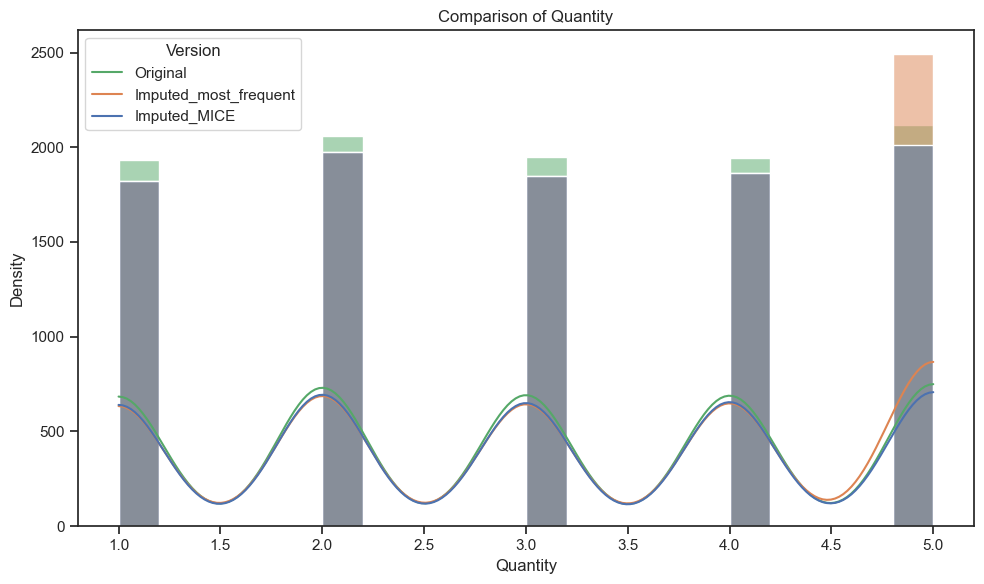

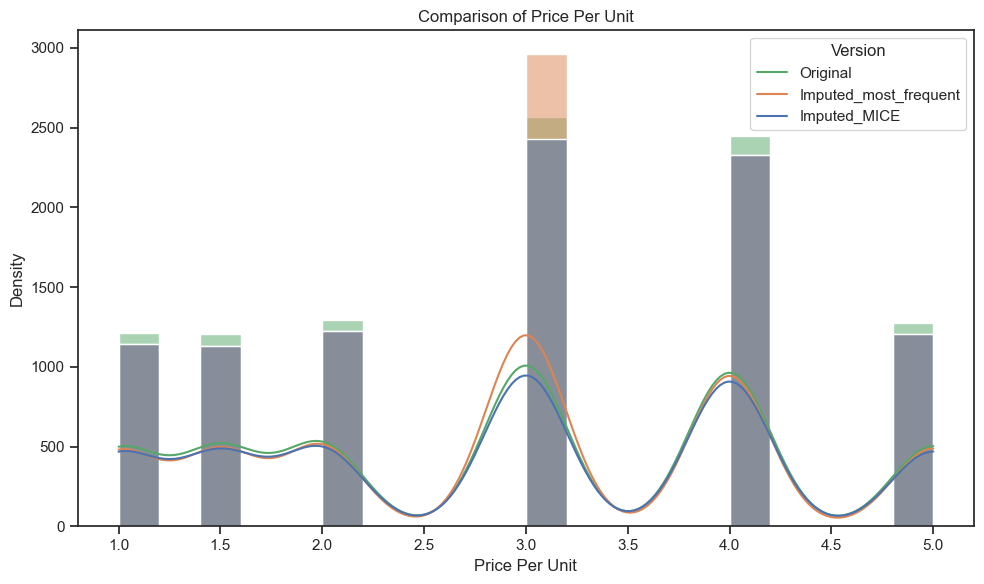

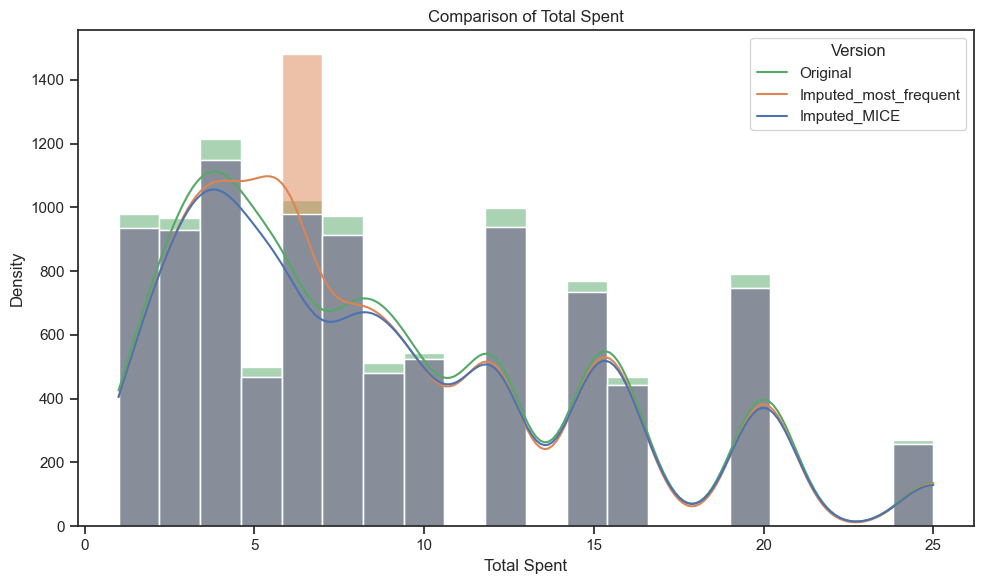

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl

def plot_comparison(df1, df2, df3, df_names, column, title, plot_type='hist'):
    """
    Функция для сравнения распределения одного столбца из трёх версий датафрейма.
    
    Параметры:
    - df1, df2, df3: Три версии датафрейма Polars.
    - df_names: Список из трёх строк с именами датафреймов (например, ["Original", "Imputed", "Filtered"]).
    - column: Название столбца для сравнения.
    - title: Заголовок графика.
    - plot_type: Тип графика ('hist' для гистограммы, 'kde' для KDE, 'box' для boxplot).
    """
    if len(df_names) != 3:
        raise ValueError("Должно быть передано ровно три имени для датафреймов.")
    
    # Преобразуем столбец в тип float, игнорируя ошибки
    df1 = df1.with_columns(pl.col(column).cast(pl.Float64, strict=False))
    df2 = df2.with_columns(pl.col(column).cast(pl.Float64, strict=False))
    df3 = df3.with_columns(pl.col(column).cast(pl.Float64, strict=False))
    
    # Добавляем метку версии
    df1 = df1.with_columns(pl.lit(df_names[0]).alias("version"))
    df2 = df2.with_columns(pl.lit(df_names[1]).alias("version"))
    df3 = df3.with_columns(pl.lit(df_names[2]).alias("version"))
    
    # Объединяем датафреймы
    combined_df = pl.concat([df1.select([column, "version"]),
                            df2.select([column, "version"]),
                            df3.select([column, "version"])])
    
    # Преобразуем в Pandas
    combined_df = combined_df.to_pandas()
    
    # Проверяем, есть ли данные для построения
    if combined_df[column].isna().all() or combined_df.empty:
        print(f"Нет данных для построения графика для столбца '{column}'.")
        return
    
    # Строим график
    plt.figure(figsize=(10, 6))
    
    if plot_type == 'hist':
        sns.histplot(data=combined_df, x=column, hue="version", kde=True, bins=20, alpha=0.5)
    elif plot_type == 'kde':
        sns.kdeplot(data=combined_df, x=column, hue="version", fill=True, alpha=0.5)
    elif plot_type == 'box':
        sns.boxplot(data=combined_df, x="version", y=column)
    else:
        raise ValueError("Неподдерживаемый тип графика. Используйте 'hist', 'kde' или 'box'.")
    
    plt.title(title)
    plt.xlabel(column if plot_type in ['hist', 'kde'] else 'Version')
    plt.ylabel('Density' if plot_type in ['hist', 'kde'] else 'Value')
    
    # Добавляем легенду только для hist и kde, если есть данные
    if plot_type in ['hist', 'kde']:
        plt.legend(labels=df_names, title='Version')
    
    plt.tight_layout()
    plt.show()

# Пример использования (предполагается, что датафреймы уже определены)
df_names = ["Original", "Imputed_most_frequent", "Imputed_MICE"]
numeric_columns = ['Quantity', 'Price Per Unit', 'Total Spent']
categorical_columns = ['Item', 'Payment Method', 'Locations']

# Предположим, что data_with_nulls, data_imp_df_simp, data_imp_df определены
for col in numeric_columns:
    plot_comparison(data_with_nulls, data_imp_df_simp, data_imp_df, df_names, col, 
                    'Comparison of ' + col, plot_type='hist')

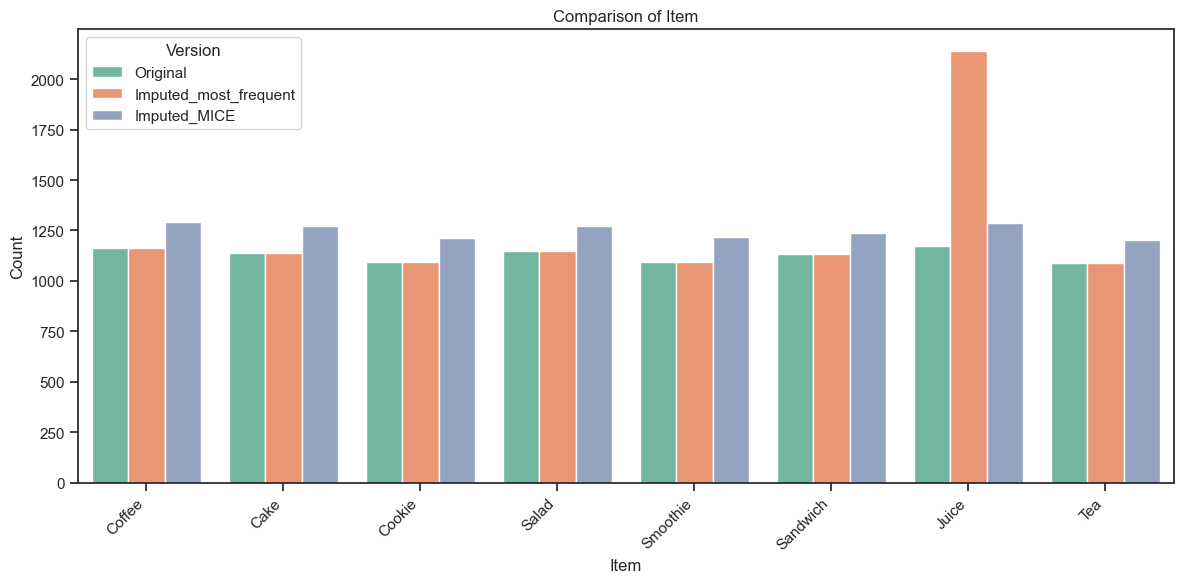

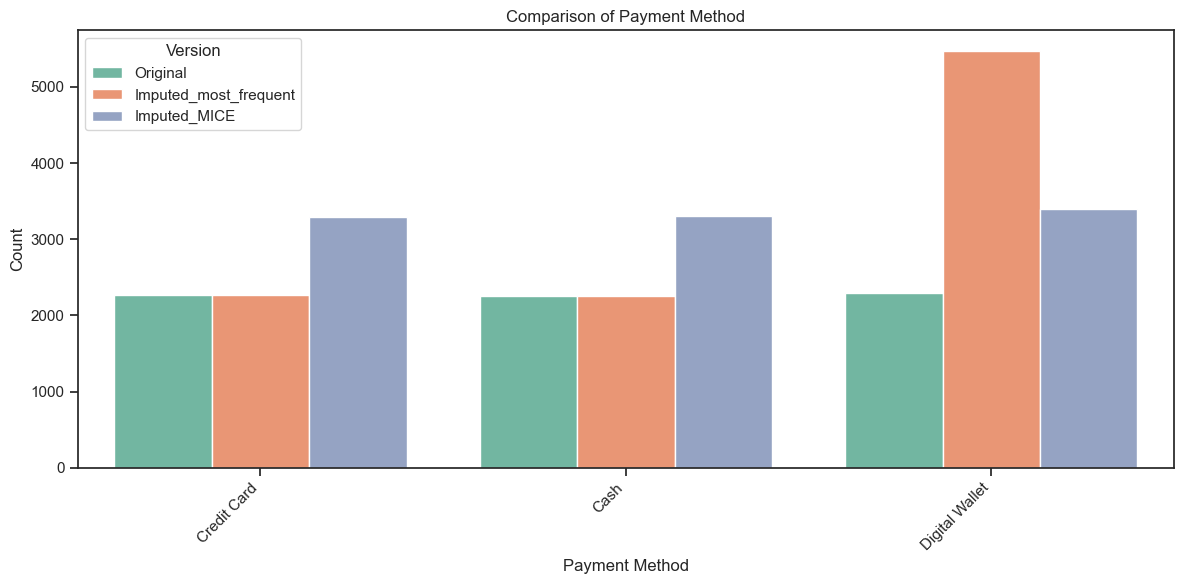

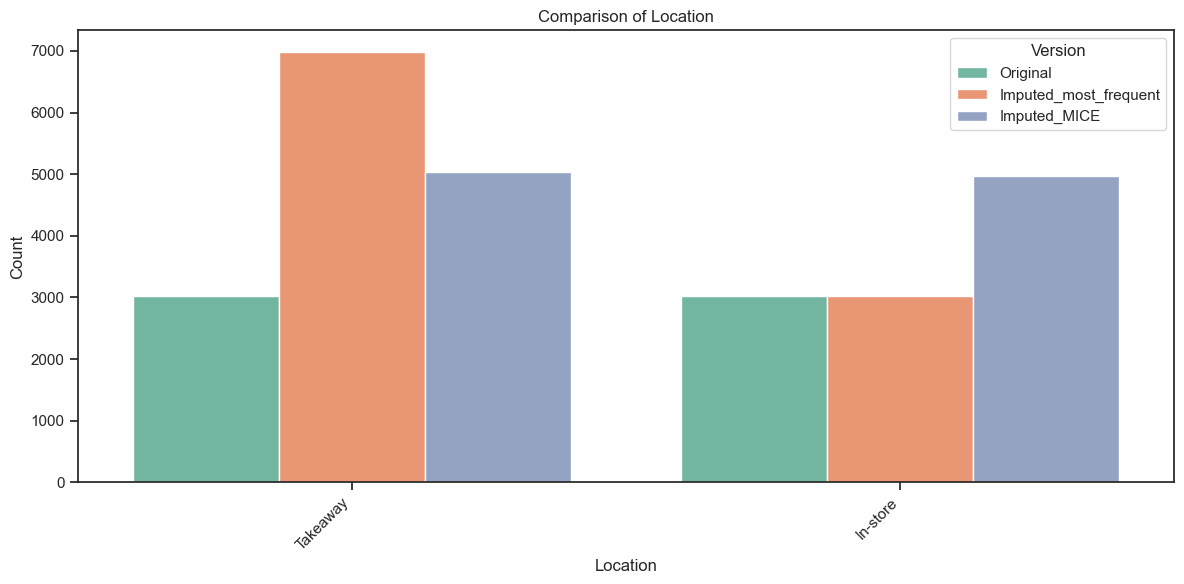

In [33]:
def plot_categorical_comparison(df1, df2, df3, df_names, column, title):
    if len(df_names) != 3:
        raise ValueError("Должно быть передано ровно три имени для датафреймов.")
    
    # Проверяем наличие столбца и выводим диагностику
    for i, df in enumerate([df1, df2, df3], 1):
        if column not in df.columns:
            print(f"Столбец '{column}' отсутствует в датафрейме {df_names[i-1]}")
            print(f"Колонки датафрейма {df_names[i-1]}: {df.columns}")
            raise ValueError(f"Столбец '{column}' отсутствует в одном из датафреймов.")
    
    # Остальной код остается без изменений
    df1 = df1.with_columns(pl.lit(df_names[0]).alias("version"))
    df2 = df2.with_columns(pl.lit(df_names[1]).alias("version"))
    df3 = df3.with_columns(pl.lit(df_names[2]).alias("version"))
    
    combined_df = pl.concat([df1.select([column, "version"]),
                            df2.select([column, "version"]),
                            df3.select([column, "version"])])
    
    combined_df = combined_df.to_pandas()
    
    if combined_df[column].isna().all() or combined_df.empty:
        print(f"Нет данных для построения графика для столбца '{column}'.")
        return
    
    plt.figure(figsize=(12, 6))
    sns.countplot(data=combined_df, x=column, hue="version", palette="Set2")
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(labels=df_names, title='Version')
    plt.tight_layout()
    plt.show()

# Запуск
df_names = ["Original", "Imputed_most_frequent", "Imputed_MICE"]
categorical_columns = ['Item', 'Payment Method', 'Location']

for col in categorical_columns:
    plot_categorical_comparison(data_with_nulls, data_imp_df_simp, data_imp_df, df_names, col, 
                               f'Comparison of {col}')

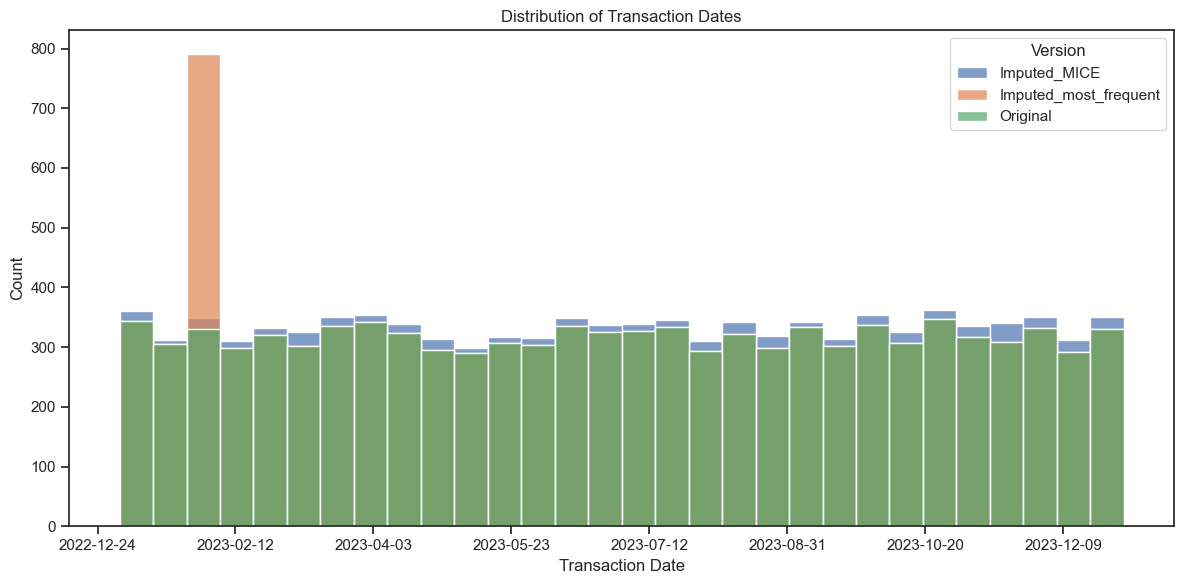

In [34]:
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

def plot_categorical_comparison(df1, df2, df3, df_names, column, title):
    if len(df_names) != 3:
        raise ValueError("Должно быть передано ровно три имени для датафреймов.")
    
    # Проверка наличия столбца во всех датафреймах
    for i, df in enumerate([df1, df2, df3], 1):
        if column not in df.columns:
            print(f"Столбец '{column}' отсутствует в датафрейме {df_names[i-1]}")
            print(f"Колонки датафрейма {df_names[i-1]}: {df.columns}")
            raise ValueError(f"Столбец '{column}' отсутствует в одном из датафреймов.")
    
    # Добавляем столбец 'version' в каждый датафрейм
    df1 = df1.with_columns(pl.lit(df_names[0]).alias("version"))
    df2 = df2.with_columns(pl.lit(df_names[1]).alias("version"))
    df3 = df3.with_columns(pl.lit(df_names[2]).alias("version"))
    
    # Выбираем нужные столбцы и приводим 'Transaction Date' к единому формату
    if column == 'Transaction Date':
        df1 = df1.select([pl.col(column).cast(pl.Date).alias(column), "version"])
        df2 = df2.select([pl.col(column).cast(pl.Date).alias(column), "version"])
        df3 = df3.select([pl.col(column).cast(pl.Date).alias(column), "version"])
    
    # Объединяем датафреймы
    combined_df = pl.concat([df1, df2, df3]).to_pandas()
    
    if combined_df[column].isna().all() or combined_df.empty:
        print(f"Нет данных для построения графика для столбца '{column}'.")
        return
    
    plt.figure(figsize=(12, 6))
    
    if column == 'Transaction Date':
        # Преобразуем в Pandas datetime после объединения
        combined_df[column] = pd.to_datetime(combined_df[column], errors='coerce')
        
        # Строим графики в обратном порядке
        for version in reversed(df_names):
            subset = combined_df[combined_df['version'] == version]
            sns.histplot(data=subset, x=column, label=version, kde=False, bins=30, alpha=0.7)
        
        plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=10))
        plt.gca().yaxis.set_major_locator(plt.MaxNLocator(nbins=10))
        plt.xticks(rotation=0)
    else:
        sns.countplot(data=combined_df, x=column, hue="version", palette="Set2")
    
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Version')
    plt.tight_layout()
    plt.show()

# Пример вызова (замените на ваши данные)
plot_categorical_comparison(data_with_nulls, data_imp_df_simp, data_imp_df, df_names, 'Transaction Date', 'Distribution of Transaction Dates')

In [35]:
df_encoded.write_csv("clean_cafe_dataset.csv")